## 문제1 - p149 Proportion test 
#### 동전이 정상적인가를 검정하기 위해 100번을 던져본 결과, 앞면이 40번 나왔으며 뒷면이 60번 나왔다. 이 동전은 정상인가를 유의수준 α=0.05로써 검정하라.  

#### 정상적인 동전을 던질 때, 앞면이 나올 확률은 50%이다.

In [47]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd
import statsmodels.api as srn
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
from sklearn.linear_model import LinearRegression

##### 1)가설 설정  
H0: p = 0.5 (주어진 동전은 정상적인 동전이다.)  
H1: p≠0.5 (주어진 동전은 정상적인 동전이 아니다.)  
α=0.05

##### 2) 가설 검정의 수행

In [6]:
count = 40
n_obs = 100
value = 0.5

stat, pval = proportions_ztest(count, n_obs, value)

print("1 Proportion test")
print('z:{0:0.3f}'.format(stat))
print('p:{0:0.3f}'.format(pval))

1 Proportion test
z:-2.041
p:0.041


##### 3) 검정결과의 판단

p-value가 유의수준 0.05보다 작으므로 귀무가설을 기각한다.  
따라서, 유의수준 0.05에서 주어진 동전은 정상적인 동전이 아니라고 할 수 있다.

## 문제2 - p151 2 Proportion test
#### 동일한 제품을 생산하는 두 공장에서 불량률을 측정한 결과 아래와 같다.  
#### 두 공정의 불량률이 같다고 할 수 있는가? (유의수준 = 0.05)
- 공장 A: N1 = 1200, X1 = 14  
- 공장 B: N2 = 1200, X2 = 5

##### 1)가설 설정  
H0: p1 = p2 (두 공장에서의 불량률은 서로 같다.)  
H1: p1≠p2 (두 공장에서의 불량률은 서로 같지 않다.)
α=0.05

##### 2) 가설 검정의 수행

In [8]:
count2 = np.array([14, 5])
n_obs2 = np.array([1200,1200])

stat2, pval2 = proportions_ztest(count2,n_obs2)

print('2 proportion test')
print('z:{0:0.3f}'.format(stat2))
print('p: {0:0.3f}'.format(pval2))

2 proportion test
z:2.073
p: 0.038


##### 3) 검정결과의 판단  
p-value가 유의수준 0.05보다 작으므로 귀무가설을 기각한다.  
따라서, 유의수준 0.05에서 두 공장에서의 불량률은 같지 않다고 할 수 있다.

## 문제3 - p159 카이제곱 검정
#### 노트북 컴퓨터의 6가지 제품(A,B,C,D,E,F)에 대하여 7가지 제품의 이미지를 중복 선택 할 수 있도록 323명의 소비자를 대상으로 설문조사한 테이블이다. 각 제품에 대해 이미지에 대해 차이가 있겠는가? (유의수준 = 0.05)

##### 1)가설 설정  
H0: A=B=C=D=E=F (각 제품에 대해 이미지 차이가 없다.)  
H1:적어도 하나의 제품에 대해 이미지 차이가 있다.  
α=0.05

In [11]:
data = pd.DataFrame({'A':[18,1,8,7,10,9,10],'B':[8,2,14,5,5,9,4],'C':[4,1,3,4,9,5,4],'D':[4,1,2,3,2,7,3],'E':[3,1,3,1,1,1,1],'F':[3,25,8,10,2,1,7]})
data

,A,B,C,D,E,F
0,18,8,4,4,3,3
1,1,2,1,1,1,25
2,8,14,3,2,3,8
3,7,5,4,3,1,10
4,10,5,9,2,1,2
5,9,9,5,7,1,1
6,10,4,4,3,1,7


##### 2) 가설 검정의 수행

In [14]:
chi, pval, dof, expected = stats.chi2_contingency(data.T)

print('chi-square test')
print('chisq:{0:0.3f}'.format(chi))
print('p:{0:0.3f}'.format(pval))
print('degree pf freedom:{}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

chi-square test
chisq:98.274
p:0.000
degree pf freedom:30
expected value: 
[[11.004  8.528 10.454  8.253  7.978  8.803  7.978]
 [ 8.21   6.362  7.799  6.157  5.952  6.568  5.952]
 [ 5.24   4.061  4.978  3.93   3.799  4.192  3.799]
 [ 3.843  2.978  3.651  2.882  2.786  3.074  2.786]
 [ 1.921  1.489  1.825  1.441  1.393  1.537  1.393]
 [ 9.782  7.581  9.293  7.336  7.092  7.825  7.092]]


##### 3) 검정결과의 판단

p-value가 유의수준 0.05보다 작으므로 귀무가설을 기각한다.  
따라서, 유의수준 0.05에서 적어도 하나의 제품에 대해 이미지 차이가 있다고 할 수 있다.

## 문제4 - p196 단순선형회귀

In [44]:
strength = [37.6,38.6,37.2,36.4,38.6,39,37.2,36.1,35.9,37.1,36.9,37.5,36.3,38.1,39,36.9,36.8,37.6,33,33.5]
time = [0.798922,0.84902,0.816163,0.758266,0.815894,0.807477,0.809068,0.7664,0.742243,0.751118,0.740629,0.751495,0.738863,0.827428,0.818172,0.740939,0.757128,0.804695,0.695121,0.735377]

##### 1)가설 설정  
H0: β1 = 0 (회귀계수 β1은 0이다.)
H1: β1≠ 0 (회귀계수 β1은 0이 아니다.)
α=0.05

#### 2) 가설 검정의 수행

In [45]:
time = sm.add_constant(time)
model = sm.OLS(strength, time)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     32.90
Date:                Wed, 11 Nov 2020   Prob (F-statistic):           1.95e-05
Time:                        23:45:22   Log-Likelihood:                -26.431
No. Observations:                  20   AIC:                             56.86
Df Residuals:                      18   BIC:                             58.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0013      4.184      3.108      0.0

#### 3) 검정결과의 판단

주어진 ANOVA테이블로부터, p-value가 유의수준 0.05보다 낮으므로 귀무가설을 기각한다.  
따라서, 회귀계수 β1는 0이 아니라고 할 수 있다.  
독립변수 x1의 p값은 0.000이므로 유의수준 0.05에서 유의미한 변수임을 알 수 있다. x1의 계수는 30.8722이다.

추정된 회귀식은 다음과 같다.

$$
\hat{Y} = 13.0013 + 30.8722 * time
$$

##### 잔차의 정규성 검정
H0: 잔차는 정규분포를 따른다.  
H1: 잔차는 정규분포를 따르지 않는다.
유의수준 = 0.05

Omnibus와 Jarque-Bera의 p-value는 유의수준 0.05보다 크므로, 귀무가설을 채택한다.  
따라서, 잔차는 정규성을 따른다고 할 수 있다.

In [56]:
result.fittedvalues

array([37.6658332 , 39.21246933, 38.19810103, 36.4106925 , 38.1897964 ,
       37.92994498, 37.97906267, 36.66180708, 35.91602703, 36.19001792,
       35.86619928, 36.20165674, 35.81167895, 38.54587651, 38.2601233 ,
       35.87576966, 36.37555992, 37.84405849, 34.4612666 , 35.70405841])

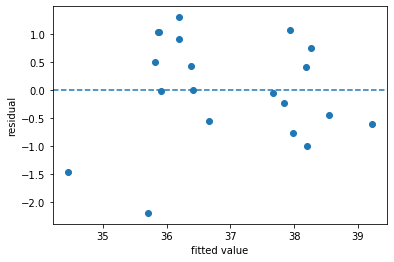

In [48]:
plt.scatter(result.fittedvalues, result.resid)
plt.xlabel('fitted value')
plt.ylabel('residual')
plt.axhline(y=0, linestyle='--')

잔차가 정규성을 따르므로, 위의 fit-residual 그래프를 살펴보았을 때, 적합값에 따라 잔차가 랜덤하게 분포함을 알 수 있다.

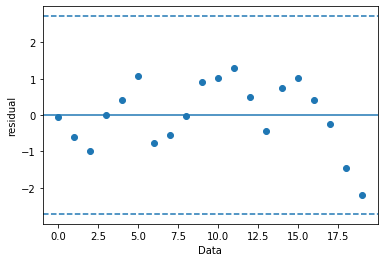

In [51]:
plt.scatter(range(0,len(result.resid)), result.resid, marker='o')
plt.xlabel('Data')
plt.ylabel('residual')
plt.axhline(y=0,linestyle='-')
plt.axhline(y=3*np.std(result.resid), linestyle='--')
plt.axhline(y=-3*np.std(result.resid),linestyle='--')

더빈 왓슨 검정 통계량을 살펴보았을 때, 0.765의 값으로 잔차들간에 양의 상관관계가 존재함을 알 수 있다. 이와같은 경향은 잔차도를 그려봤을 때, 잔차에 일정한 경향성이 있음을 확인할 수 있다.